In [1]:
# eda_cip_code_distribution.ipynb

## Program Structure Validation

Before conducting comparative analysis, we verify that CIP codes are shared across multiple institutions.

Because our research question requires cross-institution comparison within the same field, programs offered by only one institution cannot be ranked comparatively.

We examine:

- Number of schools per 4-digit CIP code
- Distribution of singleton programs
- Prevalence of "Other" (xx99) categories

In [4]:
import pandas as pd
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


root = Path.cwd().parent
df = pd.read_csv(root/"data"/"raw"/"scorecard"/"scorecard_FL_programs.csv")
df.head()

,code,title,unit_id,distance,school.type,school.main_campus,credential.level,earnings.4_yr.overall_median_earnings,earnings.4_yr.working_not_enrolled.overall_count,debt.staff_grad_plus.all.eval_inst.median,debt.staff_grad_plus.all.eval_inst.median_payment,school.name
0,3906,Theological and Ministerial Studies.,132408,3,"Private, nonprofit",1,3,31484.0,36.0,23946.0,254.0,Baptist University of Florida
1,1101,"Computer and Information Sciences, General.",132471,2,"Private, nonprofit",1,3,52714.0,66.0,27750.0,294.0,Barry University
2,1304,Educational Administration and Supervision.,132471,2,"Private, nonprofit",1,5,69477.0,87.0,51250.0,583.0,Barry University
3,2201,Law.,132471,1,"Private, nonprofit",1,7,62176.0,197.0,154477.0,1757.0,Barry University
4,2401,"Liberal Arts and Sciences, General Studies and...",132471,1,"Private, nonprofit",1,3,40411.0,36.0,38125.0,404.0,Barry University


In [5]:
code_school_counts = (
    df.groupby("code")["school.name"]
       .nunique()
       .reset_index(name="num_schools")
)

code_school_counts[code_school_counts["num_schools"]>2]

,code,num_schools
8,301,5
11,402,5
12,403,3
16,901,14
17,904,4
...,...,...
161,5211,6
162,5212,11
163,5213,3
164,5214,16


In [12]:
pct_single_school = (code_school_counts["num_schools"] == 1).mean()
pct_single_school

np.float64(0.2616279069767442)

In [23]:
single_school_codes = code_school_counts.loc[code_school_counts["num_schools"] == 1, "code"]
print(df.loc[df["code"].isin(single_school_codes), ["code", "title", "school.name"]].count())
df.loc[df["code"].isin(single_school_codes), ["code", "title", "school.name"]]

code           49
title          49
school.name    49
dtype: int64


,code,title,school.name
48,3902,Bible/Biblical Studies.,Johnson University Florida
68,1515,Engineering-Related Fields.,University of Central Florida
112,1599,"Engineering Technologies/Technicians, Other.",Daytona State College
166,100,"Agriculture, General.",Florida Agricultural and Mechanical University
204,1424,Ocean Engineering.,Florida Atlantic University
253,5219,"Specialized Sales, Merchandising and Marketin...",Florida State College at Jacksonville
305,405,Interior Architecture.,Florida International University
306,501,Area Studies.,Florida International University
419,1603,"East Asian Languages, Literatures, and Linguis...",Florida State University
421,1612,"Classics and Classical Languages, Literatures,...",Florida State University


Although 26% of CIP codes are offered by only one institution, these programs account for only 49 observations out of 1348 total observations (3.6%).

This indicates that singleton programs are structurally present but do not materially affect the overall modeling sample.

In [25]:
df.loc[
    (df["code"].astype(str).str.endswith("99")) &
    (df["code"].isin(single_school_codes)),
    ["code", "title", "school.name"]
]

,code,title,school.name
112,1599,"Engineering Technologies/Technicians, Other.",Daytona State College
884,1399,"Education, Other.",St Petersburg College
948,4299,"Psychology, Other.",University of South Florida
1189,5299,"Business, Management, Marketing, and Related S...",Florida National University-Main Campus
1271,1199,Computer and Information Sciences and Support ...,South Florida Institute of Technology


After removing residual “xx99” classifications, several programs remain that are offered by only one institution.

These programs are typically highly specialized (e.g., Ocean Engineering, Veterinary Medicine, Bioethics, Precision Metal Working) and reflect institutional differentiation rather than broad market offerings.

While these programs may produce strong outcomes, they cannot be benchmarked comparatively because no peer institutions offer the same CIP × credential combination.

In [9]:
shared_codes = code_school_counts.loc[code_school_counts["num_schools"] >= 10, "code"]
print(df.loc[df["code"].isin(shared_codes), ["code", "title", "school.name"]].count())
df.loc[df["code"].isin(shared_codes), ["code","title", "school.name"]].drop_duplicates().head(30)

code           992
title          992
school.name    992
dtype: int64


,code,title,school.name
1,1101,"Computer and Information Sciences, General.",Barry University
2,1304,Educational Administration and Supervision.,Barry University
3,2201,Law.,Barry University
4,2401,"Liberal Arts and Sciences, General Studies and...",Barry University
5,2601,"Biology, General.",Barry University
7,3105,Health and Physical Education/Fitness.,Barry University
8,4201,"Psychology, General.",Barry University
12,4407,Social Work.,Barry University
14,5107,Health and Medical Administrative Services.,Barry University
15,5109,"Allied Health Diagnostic, Intervention, and Tr...",Barry University


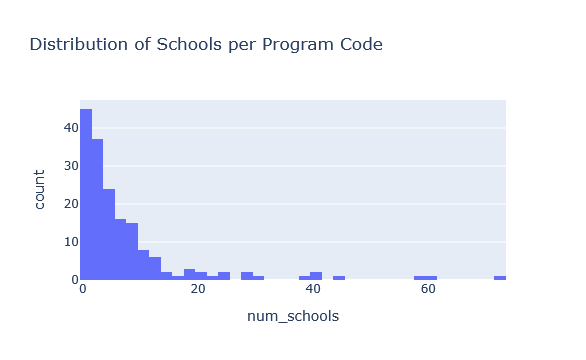

In [10]:
code_school_counts = (
    df.groupby("code")["school.name"]
       .nunique()
       .reset_index(name="num_schools")
)

fig = px.histogram(
    code_school_counts,
    x="num_schools",
    nbins=50,
    title="Distribution of Schools per Program Code"
)

fig.show()

We observe that most program codes are offered by multiple institutions, with 992 codes appearing in at least 10 schools. Only a minority of programs are singletons. 

## Treatment of Singleton and Residual Programs

Programs classified as "Other" (xx99) or offered by only one institution are excluded from comparative modeling.

While such programs may be substantively meaningful, they do not permit benchmarking across institutions.

These programs are retained descriptively but omitted from value-added ranking.